# Import required libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import re
import string
import itertools
from wordcloud import WordCloud, ImageColorGenerator
import nltk 
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import *
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.layers import RNN
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Activation
from tensorflow.keras.losses import Hinge
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pickle
from sklearn.linear_model import LogisticRegressionCV

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pickle
from sklearn.linear_model import LogisticRegressionCV
import keras
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, Input, Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding, Dropout
from keras.layers import LSTM
from keras.layers import BatchNormalization
from keras.models import Model

In [4]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

### Loading WELFake Dataset (Verma et al., 2021)

In [5]:
news = pd.read_csv("/content/drive/MyDrive/WELFake_Dataset.csv")
news.head (5)

Unnamed: 0                                              title  \
0           0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1           1                                                NaN   
2           2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3           3  Bobby Jindal, raised Hindu, uses story of Chri...   
4           4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
1     Did they post their votes for Hillary already?      1  
2   Now, most of the demonstrators gathered last ...      1  
3  A dozen politically active pastors came here f...      0  
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1

In [6]:
news.drop('Unnamed: 0', axis=1, inplace=True)
news.head (5)

title  \
0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1                                                NaN   
2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3  Bobby Jindal, raised Hindu, uses story of Chri...   
4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
1     Did they post their votes for Hillary already?      1  
2   Now, most of the demonstrators gathered last ...      1  
3  A dozen politically active pastors came here f...      0  
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1

In [7]:
print (news)

                                                   title  \
0      LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1                                                    NaN   
2      UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3      Bobby Jindal, raised Hindu, uses story of Chri...   
4      SATAN 2: Russia unvelis an image of its terrif...   
...                                                  ...   
72129  Russians steal research on Trump in hack of U....   
72130   WATCH: Giuliani Demands That Democrats Apolog...   
72131  Migrants Refuse To Leave Train At Refugee Camp...   
72132  Trump tussle gives unpopular Mexican leader mu...   
72133  Goldman Sachs Endorses Hillary Clinton For Pre...   

                                                    text  label  
0      No comment is expected from Barack Obama Membe...      1  
1         Did they post their votes for Hillary already?      1  
2       Now, most of the demonstrators gathered last ...      1  
3      A dozen 

In [8]:
news.text=news.text.astype(str)

In [9]:
print(news.shape)

(72134, 3)


In [10]:
news.count()

title    71576
text     72134
label    72134
dtype: int64

In [11]:
news.dtypes

title    object
text     object
label     int64
dtype: object

In [12]:
news.describe()

label
count  72134.000000
mean       0.514404
std        0.499796
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000

In [13]:
news

title  \
0      LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1                                                    NaN   
2      UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3      Bobby Jindal, raised Hindu, uses story of Chri...   
4      SATAN 2: Russia unvelis an image of its terrif...   
...                                                  ...   
72129  Russians steal research on Trump in hack of U....   
72130   WATCH: Giuliani Demands That Democrats Apolog...   
72131  Migrants Refuse To Leave Train At Refugee Camp...   
72132  Trump tussle gives unpopular Mexican leader mu...   
72133  Goldman Sachs Endorses Hillary Clinton For Pre...   

                                                    text  label  
0      No comment is expected from Barack Obama Membe...      1  
1         Did they post their votes for Hillary already?      1  
2       Now, most of the demonstrators gathered last ...      1  
3      A dozen politically active pastors came here f...      0  
4      The RS-28 Sarmat missile, dubbed Satan 2, will...      1  
...                                                  ...    ...  
72129  WASHINGTON (Reuters) - Hackers believed to be ...      0  
72130  You know, because in fantasyland Republicans n...      1  
72131  Migrants Refuse To Leave Train At Refugee Camp...      0  
72132  MEXICO CITY (Reuters) - Donald Trump’s combati...      0  
72133  Goldman Sachs Endorses Hillary Clinton For Pre...      1  

[72134 rows x 3 columns]

In [14]:
encoded_data = news
reduced_data = encoded_data

In [15]:
reduced_data.head(10)

title  \
0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1                                                NaN   
2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3  Bobby Jindal, raised Hindu, uses story of Chri...   
4  SATAN 2: Russia unvelis an image of its terrif...   
5  About Time! Christian Group Sues Amazon and SP...   
6  DR BEN CARSON TARGETED BY THE IRS: “I never ha...   
7  HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...   
8  Sports Bar Owner Bans NFL Games…Will Show Only...   
9  Latest Pipeline Leak Underscores Dangers Of Da...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
1     Did they post their votes for Hillary already?      1  
2   Now, most of the demonstrators gathered last ...      1  
3  A dozen politically active pastors came here f...      0  
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1  
5  All we can say on this one is it s about time ...      1  
6  DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...      1  
7                                                         1  
8  The owner of the Ringling Bar, located south o...      1  
9  FILE – In this Sept. 15, 2005 file photo, the ...      1

In [16]:
cleaned_data = reduced_data
cleaned_data.head(5)

title  \
0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1                                                NaN   
2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3  Bobby Jindal, raised Hindu, uses story of Chri...   
4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
1     Did they post their votes for Hillary already?      1  
2   Now, most of the demonstrators gathered last ...      1  
3  A dozen politically active pastors came here f...      0  
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1

### Text Preprocessing removing URL, HTML, Unnecessary texts, integers, emojis, punctuation etc

In [17]:
def remove_URL(text):
    url = re.compile(r"https?://\S+|www\.\S+")
    return url.sub(r"", text)

def remove_html(text):
    html = re.compile(r"<.*?>")
    return html.sub(r"", text)

In [18]:
text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

def text_cleaning(text):
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    return text

In [19]:
def number_cleaning(text):
    text = ''.join(c for c in text if not c.isdigit())
    return text

In [20]:
def remove_emoji(string):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F" #emoticons
        u"\U0001F300-\U0001F5FF" #symbols & pictographs
        u"\U0001F680-\U0001F6FF" #transport & map symbols
        u"\U0001F1E0-\U0001F1FF" #FLAGS on (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+",
        flags=re.UNICODE,
    )
    return emoji_pattern.sub(r"", string)

In [21]:
def remove_punctuation(text):
    table = str.maketrans("", "", string.punctuation)
    return text.translate(table)

In [22]:
def stemming_words(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text

In [23]:
stop = set(stopwords.words("english"))

def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]

    return " ".join(text)

In [24]:
MAX_SEQUENCE_LENGTH = 400
MAX_NB_WORDS = 10000
EMBEDDING_DIM = 200
VALIDATION_SPLIT = 0.2

In [25]:
texts = []
labels = []

for i in range(cleaned_data.text.shape[0]):
    text1 =cleaned_data.title	[i]
    text2 = cleaned_data.text[i]
    text = str(text1) +""+ str(text2)
    texts.append(text)
    labels.append(cleaned_data.label[i])

tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 362913 unique tokens.


In [26]:
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
labels = keras.utils.np_utils.to_categorical(np.asarray(labels),num_classes = 2)
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (72134, 400)
Shape of label tensor: (72134, 2)


In [27]:
# Train test validation Split
from sklearn.model_selection import train_test_split

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
x_train, x_test, y_train, y_test = train_test_split( data, labels, test_size=0.2, random_state=42)
x_test, x_val, y_test, y_val = train_test_split( x_test, y_test, test_size=0.80, random_state=42)
print('Size of train, test:', len(y_train), len(y_val), len(y_test))

print('real & fake news in train, test:')
print(y_train.sum(axis=0))
print(y_val.sum(axis=0))
print(y_test.sum(axis=0))

Size of train, test: 57707 11542 2885
real & fake news in train, test:
[27991. 29716.]
[5661. 5881.]
[1376. 1509.]


In [28]:
cleaned_data.head(5)

title  \
0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1                                                NaN   
2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3  Bobby Jindal, raised Hindu, uses story of Chri...   
4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
1     Did they post their votes for Hillary already?      1  
2   Now, most of the demonstrators gathered last ...      1  
3  A dozen politically active pastors came here f...      0  
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1

In [29]:
cleaned_data.text

0        No comment is expected from Barack Obama Membe...
1           Did they post their votes for Hillary already?
2         Now, most of the demonstrators gathered last ...
3        A dozen politically active pastors came here f...
4        The RS-28 Sarmat missile, dubbed Satan 2, will...
                               ...                        
72129    WASHINGTON (Reuters) - Hackers believed to be ...
72130    You know, because in fantasyland Republicans n...
72131    Migrants Refuse To Leave Train At Refugee Camp...
72132    MEXICO CITY (Reuters) - Donald Trump’s combati...
72133    Goldman Sachs Endorses Hillary Clinton For Pre...
Name: text, Length: 72134, dtype: object

### Split the Dataset

In [30]:
train_size = 0.8

In [31]:
train_data, test_data = train_test_split(cleaned_data, test_size=1-train_size,
                                         random_state=7)

print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 57707
Test Data size 14427


In [32]:
train_data.head(10)

title  \
15018   John Oliver Exposes The GOP’s Dirty Plan To W...   
36371  Alien Visitors? No Explanation for Mysterious ...   
49324                     The reinvention of Mitt Romney   
71333  Putin Is Giving Guns and Ammo to the Alt-Right...   
34393  HARVARD BULLIED INTO Dropping 80 Year Old “Rac...   
39906  Jeb Bush 3.0 will crash and burn: Why his new ...   
41622  Twitter’s Chief Operating Officer to Step Down...   
28605  Putin congratulates Trump. Reset of US-Russian...   
2419   Venezuela ex-prosecutor says she has evidence ...   
20058  Lebanese president says Trump decision threate...   

                                                    text  label  
15018  During a segment of Last Week Tonight, John Ol...      1  
36371  Kaboom! Meteor Turns Night Into Day in Arizona...      1  
49324  A verdict in 2017 could have sweeping conseque...      0  
71333  Citizen journalism with a punch Putin Is Givin...      1  
34393  Harvard is agreeing to erase the history of th...      1  
39906  It seems like every few weeks we get a new exp...      0  
41622  SAN FRANCISCO  —   For many months, Twitter ha...      0  
28605  Putin congratulates Trump. Reset of US-Russian...      1  
2419   BRASILIA/CARACAS (Reuters) - Dismissed Venezue...      0  
20058  BEIRUT (Reuters) - Lebanon s President Michel ...      0

### Tokenisation, training datsets, sequences, padding

In [33]:
vocabulary_size = 100000
max_word_length = 600
oov_tk = "<OOV>"
trunc_type='post'
padding_type='post'

In [44]:
train_data = train_data.dropna()

In [34]:
tokenizer = Tokenizer(num_words = vocabulary_size, oov_token = oov_tk)
tokenizer.fit_on_texts(train_data.text)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1

print("Vocabulary Size :", vocab_size)

Vocabulary Size : 284415


In [35]:
train_sequences = tokenizer.texts_to_sequences(train_data.text	)
test_sequences = tokenizer.texts_to_sequences(test_data.text	)

In [36]:
x_train = pad_sequences(train_sequences, maxlen=max_word_length, padding=padding_type, truncating=trunc_type)
x_test = pad_sequences(test_sequences, maxlen=max_word_length, padding=padding_type, truncating=trunc_type)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (57707, 600)
Testing X Shape: (14427, 600)


### Label Encoding

In [37]:
labels = train_data.label.unique().tolist()

In [38]:
encoder = LabelEncoder()
encoder.fit(train_data.label.to_list())

y_train = encoder.transform(train_data.label.to_list())
y_test = encoder.transform(test_data.label.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (57707, 1)
y_test shape: (14427, 1)


In [39]:
vocabulary_size =len(word_index)
print('The size of the news dataset vocabulary is: ', vocabulary_size)

The size of the news dataset vocabulary is:  284414


In [40]:
training_sequence = x_train.shape[1]
print('The length of training sequence is: ', training_sequence)

The length of training sequence is:  600


In [41]:
print('The length of testing sequence is: ', x_test.shape[1])

The length of testing sequence is:  600


### Pretrained GloVe.6B.200 word embedding

In [42]:
embeddings_index = {}

with open("/content/drive/MyDrive/glove.6B.200d.txt", encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [43]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 284414 unique tokens.


In [44]:
embeddings_index

{'the': array([-7.1549e-02,  9.3459e-02,  2.3738e-02, -9.0339e-02,  5.6123e-02,
         3.2547e-01, -3.9796e-01, -9.2139e-02,  6.1181e-02, -1.8950e-01,
         1.3061e-01,  1.4349e-01,  1.1479e-02,  3.8158e-01,  5.4030e-01,
        -1.4088e-01,  2.4315e-01,  2.3036e-01, -5.5339e-01,  4.8154e-02,
         4.5662e-01,  3.2338e+00,  2.0199e-02,  4.9019e-02, -1.4132e-02,
         7.6017e-02, -1.1527e-01,  2.0060e-01, -7.7657e-02,  2.4328e-01,
         1.6368e-01, -3.4118e-01, -6.6070e-02,  1.0152e-01,  3.8232e-02,
        -1.7668e-01, -8.8153e-01, -3.3895e-01, -3.5481e-02, -5.5095e-01,
        -1.6899e-02, -4.3982e-01,  3.9004e-02,  4.0447e-01, -2.5880e-01,
         6.4594e-01,  2.6641e-01,  2.8009e-01, -2.4625e-02,  6.3302e-01,
        -3.1700e-01,  1.0271e-01,  3.0886e-01,  9.7792e-02, -3.8227e-01,
         8.6552e-02,  4.7075e-02,  2.3511e-01, -3.2127e-01, -2.8538e-01,
         1.6670e-01, -4.9707e-03, -6.2714e-01, -2.4904e-01,  2.9713e-01,
         1.4379e-01, -1.2325e-01, -5.8178e-0

In [45]:
num_words = len(word_index) + 1
embedding_dimension = 200

embedding_matrix = np.zeros((vocab_size, embedding_dimension))

for word, i in word_index.items():
    if i < num_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [46]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.071549  ,  0.093459  ,  0.023738  , ...,  0.33616999,
         0.030591  ,  0.25577   ],
       ...,
       [-0.24616   , -0.78293997,  0.28683999, ...,  0.16937999,
         0.30978999,  0.79016   ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [47]:
word_index["good"]

221

In [48]:
embeddings_index.get("good")

array([ 5.1507e-01,  3.5596e-01,  1.5710e-01, -7.4075e-02, -2.5446e-01,
       -1.1357e-01, -4.9943e-01, -1.2626e-01,  3.8851e-01,  5.4204e-01,
        1.0479e-01,  4.4099e-01, -6.5490e-02,  5.8463e-02,  4.1150e-01,
        5.6709e-01, -1.1869e-01,  2.5107e-01,  2.5640e-01, -2.1615e-01,
        6.4170e-01,  2.7875e+00,  1.2036e-01,  4.9481e-02,  2.4843e-01,
       -6.7390e-01,  1.1957e-03,  3.5802e-01, -1.7588e-01, -3.9135e-01,
       -1.4093e-02,  2.3610e-01, -4.3184e-01, -2.7045e-02,  2.2829e-02,
       -2.8283e-01, -5.0008e-01, -1.1275e-01, -4.5002e-01,  3.3634e-01,
       -5.7722e-03,  3.3005e-01, -2.4671e-01,  1.7358e-01, -3.5508e-01,
       -3.9378e-02,  4.8834e-01,  1.4180e-01, -1.7579e-01,  3.1760e-01,
       -1.5194e-01, -1.1244e-01, -7.0078e-02,  7.4877e-01, -6.2074e-02,
       -1.7296e-01,  1.5001e-01, -5.8035e-02,  1.9471e-01, -2.9521e-01,
        5.0281e-01, -3.3074e-01, -5.4041e-01,  6.4659e-02,  4.1465e-02,
        4.9930e-01,  8.0902e-02,  4.7806e-01,  5.8307e-01,  4.08

In [49]:
(embedding_matrix[221] == embeddings_index.get("good")).all()

True

### Analysing the shapes of training and testing datasets

In [50]:
print(x_train.shape)
print(y_train.shape)

(57707, 600)
(57707, 1)


In [51]:
print(x_test.shape)
print(y_test.shape)

(14427, 600)
(14427, 1)


In [52]:
print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Training on GPU...


### Employ LSTM

In [53]:
model = tf.keras.Sequential([

    tf.keras.layers.Embedding(vocab_size, embedding_dimension, 
                            weights=[embedding_matrix], 
                            input_length=max_word_length, 
                            trainable=False),

    tf.keras.layers.SpatialDropout1D(0.20),
    tf.keras.layers.LSTM((128), return_sequences=True),
    tf.keras.layers.LSTM((128)),
    tf.keras.layers.Dropout(0.30),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, kernel_regularizer=l2(0.01)),
    tf.keras.layers.Activation('linear')
])

In [54]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 600, 200)          56883000  
                                                                 
 spatial_dropout1d (SpatialD  (None, 600, 200)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 600, 128)          168448    
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                        

### Model training 

In [55]:
number_of_epochs = 25
batch_size = 256

LSTM_history = model.fit(x_train, y_train, 
                                    epochs = number_of_epochs,
                                    batch_size = batch_size,
                   validation_data=(x_test, y_test), 
                                    verbose=1)

Epoch 1/25
226/226 [==============================] - 40s 142ms/step - loss: 0.7898 - accuracy: 0.5548 - val_loss: 0.6704 - val_accuracy: 0.6001
Epoch 2/25
226/226 [==============================] - 32s 142ms/step - loss: 0.6646 - accuracy: 0.6033 - val_loss: 0.6249 - val_accuracy: 0.6456
Epoch 3/25
226/226 [==============================] - 32s 142ms/step - loss: 0.6937 - accuracy: 0.6154 - val_loss: 0.6080 - val_accuracy: 0.6628
Epoch 4/25
226/226 [==============================] - 32s 141ms/step - loss: 0.6635 - accuracy: 0.6547 - val_loss: 4.2064 - val_accuracy: 0.6885
Epoch 5/25
226/226 [==============================] - 31s 137ms/step - loss: 0.6242 - accuracy: 0.7648 - val_loss: 0.3962 - val_accuracy: 0.9033
Epoch 6/25
226/226 [==============================] - 32s 144ms/step - loss: 0.4527 - accuracy: 0.8465 - val_loss: 0.7224 - val_accuracy: 0.4499
Epoch 7/25
226/226 [==============================] - 32s 141ms/step - loss: 0.6868 - accuracy: 0.5547 - val_loss: 0.6843 - val_ac

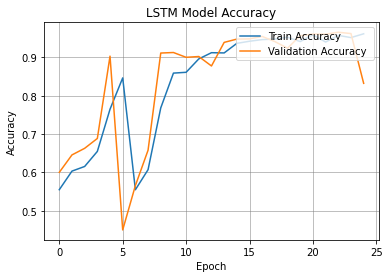

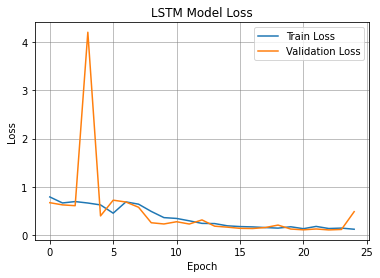

In [56]:
plt.plot(LSTM_history.history['accuracy'])
plt.plot(LSTM_history.history['val_accuracy'])
plt.title('LSTM Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Validation Accuracy '], loc='upper right')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.show()


plt.plot(LSTM_history.history['loss'])
plt.plot(LSTM_history.history['val_loss'])
plt.title('LSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Validation Loss'], loc='upper right')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.show()

### Model predication and evaluation

In [57]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

451/451 [==============================] - 10s 22ms/step - loss: 0.4840 - accuracy: 0.8324
Test Loss: 0.4839932322502136
Test Accuracy: 0.8323975801467896


In [58]:
model_scores = model.predict(x_test, verbose=1, batch_size=256)

57/57 [==============================] - 3s 47ms/step


In [59]:
model_scores

array([[0.01413544],
       [0.06884354],
       [0.00435887],
       ...,
       [0.00398496],
       [1.4593848 ],
       [0.00299303]], dtype=float32)

In [60]:
LSTM_y_pred=np.where(model_scores>0.5,1,0)

In [61]:
LSTM_y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [62]:
print(accuracy_score(y_test, LSTM_y_pred))

0.8323975878561032


In [63]:
print(classification_report(y_test, LSTM_y_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.85      7049
           1       1.00      0.67      0.80      7378

    accuracy                           0.83     14427
   macro avg       0.87      0.84      0.83     14427
weighted avg       0.87      0.83      0.83     14427



### confusion_matrix

In [64]:
LSTM_CM=confusion_matrix(y_test, LSTM_y_pred)
print(LSTM_CM)

[[7036   13]
 [2405 4973]]


In [65]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalised confusion matrix")
    else:
        print('Confusion matrix, without normalisation')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalisation
[[7036   13]
 [2405 4973]]


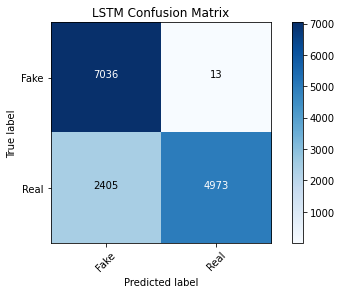

In [66]:
categories = ['Fake','Real']
LSTM_cnf_matrix = confusion_matrix(y_test, LSTM_y_pred)
plot_confusion_matrix(cm=LSTM_cnf_matrix, classes=categories, title='LSTM Confusion Matrix')
plt.show()

### CNN Model 

In [67]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dimension, 
                            weights=[embedding_matrix], 
                            input_length=max_word_length, 
                            trainable=False),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv1D(64, 4, activation='relu'),
    tf.keras.layers.MaxPooling1D(),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(1)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [68]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 600, 200)          56883000  
                                                                 
 dropout_1 (Dropout)         (None, 600, 200)          0         
                                                                 
 conv1d (Conv1D)             (None, 597, 64)           51264     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 298, 64)          0         
 )                                                               
                                                                 
 bidirectional (Bidirectiona  (None, 2)                528       
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 1)                

### Model training 

In [69]:
number_of_epochs = 25
batch_size = 256

CNN_history = model.fit(x_train, y_train, 
                                    epochs = number_of_epochs,
                                    batch_size = batch_size,
                   validation_data=(x_test, y_test), 
                                    verbose=1)

Epoch 1/25
226/226 [==============================] - 18s 49ms/step - loss: 0.5007 - accuracy: 0.8399 - val_loss: 0.4417 - val_accuracy: 0.8609
Epoch 2/25
226/226 [==============================] - 11s 48ms/step - loss: 0.3916 - accuracy: 0.9036 - val_loss: 0.3453 - val_accuracy: 0.9270
Epoch 3/25
226/226 [==============================] - 10s 45ms/step - loss: 0.3265 - accuracy: 0.9282 - val_loss: 0.2893 - val_accuracy: 0.9455
Epoch 4/25
226/226 [==============================] - 10s 46ms/step - loss: 0.2806 - accuracy: 0.9388 - val_loss: 0.2123 - val_accuracy: 0.9482
Epoch 5/25
226/226 [==============================] - 11s 47ms/step - loss: 0.2523 - accuracy: 0.9002 - val_loss: 0.2013 - val_accuracy: 0.9204
Epoch 6/25
226/226 [==============================] - 10s 45ms/step - loss: 0.2219 - accuracy: 0.9144 - val_loss: 0.1979 - val_accuracy: 0.9403
Epoch 7/25
226/226 [==============================] - 10s 45ms/step - loss: 0.2086 - accuracy: 0.9428 - val_loss: 0.1754 - val_accuracy:

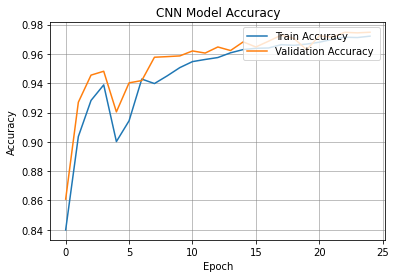

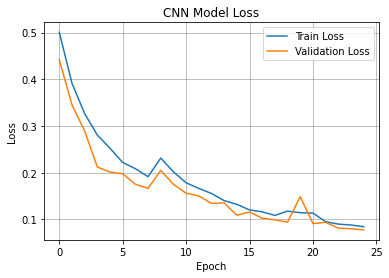

In [70]:
plt.plot(CNN_history.history['accuracy'])
plt.plot(CNN_history.history['val_accuracy'])
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Validation Accuracy '], loc='upper right')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.show()


plt.plot(CNN_history.history['loss'])
plt.plot(CNN_history.history['val_loss'])
plt.title('CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Validation Loss'], loc='upper right')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.show()

### Model predication and evaluation

In [71]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

451/451 [==============================] - 5s 10ms/step - loss: 0.0776 - accuracy: 0.9748
Test Loss: 0.07755745202302933
Test Accuracy: 0.9747695326805115


In [72]:
CNN_scores = model.predict(x_test, verbose=1, batch_size=256)

57/57 [==============================] - 2s 15ms/step


In [73]:
CNN_scores

array([[0.01319805],
       [0.9460773 ],
       [0.01922462],
       ...,
       [0.01287035],
       [0.98953575],
       [0.00539071]], dtype=float32)

In [74]:
CNN_y_pred=np.where(CNN_scores>0.5,1,0)

In [75]:
CNN_y_pred

array([[0],
       [1],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [76]:
print(accuracy_score(y_test, CNN_y_pred))

0.9747695293546822


In [77]:
print(classification_report(y_test, CNN_y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      7049
           1       0.98      0.97      0.98      7378

    accuracy                           0.97     14427
   macro avg       0.97      0.97      0.97     14427
weighted avg       0.97      0.97      0.97     14427



### confusion_matrix

In [78]:
CNN_CM=confusion_matrix(y_test, CNN_y_pred)
print(CNN_CM)

[[6872  177]
 [ 187 7191]]


In [79]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalised confusion matrix")
    else:
        print('Confusion matrix, without normalisation')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalisation
[[6872  177]
 [ 187 7191]]


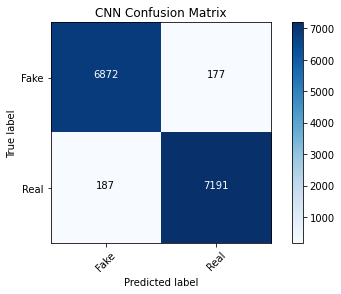

In [80]:
categories = ['Fake','Real']
CNN_cnf_matrix = confusion_matrix(y_test, CNN_y_pred)
plot_confusion_matrix(cm=CNN_cnf_matrix, classes=categories, title='CNN Confusion Matrix')
plt.show()

### BiLSTM_RNN(Bahad et al., 2019)

In [81]:
BiLSTM_RNN_model= tf.keras.Sequential([

    tf.keras.layers.Embedding(vocab_size, embedding_dimension, 
                            weights=[embedding_matrix], 
                            input_length=max_word_length, 
                            trainable=False),

    tf.keras.layers.SpatialDropout1D(0.20),
    tf.keras.layers.LSTM((128), return_sequences=True),
    tf.keras.layers.Dropout(0.20),
    tf.keras.layers.LSTM((256)),
    tf.keras.layers.Dropout(0.40),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(1, kernel_regularizer=l2(0.01)),
    tf.keras.layers.Activation('linear')
])

In [82]:
BiLSTM_RNN_model.compile(loss=tf.keras.losses.Hinge(),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [83]:
BiLSTM_RNN_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [84]:
print(BiLSTM_RNN_model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 600, 200)          56883000  
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 600, 200)         0         
 lDropout1D)                                                     
                                                                 
 lstm_3 (LSTM)               (None, 600, 128)          168448    
                                                                 
 dropout_2 (Dropout)         (None, 600, 128)          0         
                                                                 
 lstm_4 (LSTM)               (None, 256)               394240    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                      

### Model Training 

In [85]:
number_of_epochs = 25
batch_size = 256

BiLSTM_RNN_history = BiLSTM_RNN_model.fit(x_train, y_train, 
                                    epochs = number_of_epochs,
                                    batch_size = batch_size,
                   validation_data=(x_test, y_test), 
                                    verbose=1)

Epoch 1/25
226/226 [==============================] - 55s 232ms/step - loss: 0.7570 - accuracy: 0.5570 - val_loss: 0.6930 - val_accuracy: 0.5743
Epoch 2/25
226/226 [==============================] - 52s 229ms/step - loss: 0.6841 - accuracy: 0.5741 - val_loss: 0.6621 - val_accuracy: 0.6109
Epoch 3/25
226/226 [==============================] - 52s 231ms/step - loss: 0.6606 - accuracy: 0.5980 - val_loss: 0.6465 - val_accuracy: 0.6315
Epoch 4/25
226/226 [==============================] - 52s 230ms/step - loss: 0.6419 - accuracy: 0.6661 - val_loss: 0.3053 - val_accuracy: 0.8936
Epoch 5/25
226/226 [==============================] - 51s 226ms/step - loss: 0.3475 - accuracy: 0.8993 - val_loss: 0.3466 - val_accuracy: 0.8802
Epoch 6/25
226/226 [==============================] - 51s 225ms/step - loss: 0.3379 - accuracy: 0.8820 - val_loss: 0.1948 - val_accuracy: 0.9308
Epoch 7/25
226/226 [==============================] - 51s 225ms/step - loss: 0.2995 - accuracy: 0.9045 - val_loss: 0.1964 - val_ac

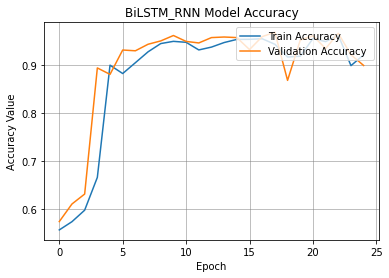

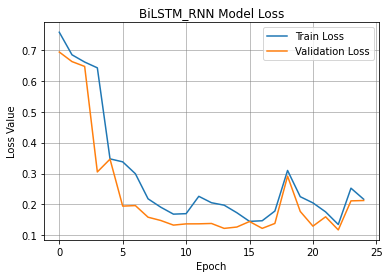

In [86]:
plt.plot(BiLSTM_RNN_history.history['accuracy'])
plt.plot(BiLSTM_RNN_history.history['val_accuracy'])
plt.title('BiLSTM_RNN Model Accuracy')
plt.ylabel('Accuracy Value')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Validation Accuracy '], loc='upper right')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.show()


plt.plot(BiLSTM_RNN_history.history['loss'])
plt.plot(BiLSTM_RNN_history.history['val_loss'])
plt.title('BiLSTM_RNN Model Loss')
plt.ylabel('Loss Value')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Validation Loss'], loc='upper right')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.show()

### Model predication and evaluation

In [87]:
test_loss, test_acc = BiLSTM_RNN_model.evaluate(x_test, y_test)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

451/451 [==============================] - 11s 24ms/step - loss: 0.2128 - accuracy: 0.8987
Test Loss: 0.21281836926937103
Test Accuracy: 0.8986622095108032


In [88]:
BiLSTM_RNN_scores = BiLSTM_RNN_model.predict(x_test, verbose=1, batch_size=256)

57/57 [==============================] - 5s 73ms/step


In [89]:
BiLSTM_RNN_scores

array([[ 0.20644785],
       [ 0.3499539 ],
       [-0.03753588],
       ...,
       [-0.03545956],
       [ 1.777569  ],
       [-0.04188372]], dtype=float32)

In [90]:
BiLSTM_RNN_y_pred=np.where(BiLSTM_RNN_scores>0.5,1,0)

In [91]:
BiLSTM_RNN_y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [92]:
print(accuracy_score(y_test, BiLSTM_RNN_y_pred))

0.8986622305399597


In [93]:
print(classification_report(y_test, BiLSTM_RNN_y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      7049
           1       1.00      0.81      0.89      7378

    accuracy                           0.90     14427
   macro avg       0.91      0.90      0.90     14427
weighted avg       0.91      0.90      0.90     14427



### confusion_matrix

In [94]:
BiLSTM_RNN_CM=confusion_matrix(y_test,BiLSTM_RNN_y_pred)
print(BiLSTM_RNN_CM)

[[7023   26]
 [1436 5942]]


In [95]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalised confusion matrix")
    else:
        print('Confusion matrix, without normalisation')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalisation
[[7023   26]
 [1436 5942]]


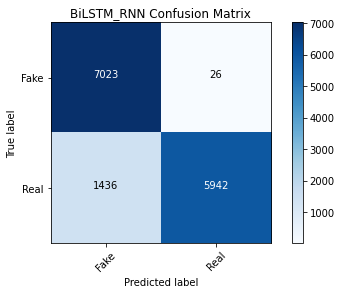

In [96]:
categories = ['Fake','Real']
BiLSTM_RNN_cnf_matrix = confusion_matrix(y_test, BiLSTM_RNN_y_pred)
plot_confusion_matrix(cm=BiLSTM_RNN_cnf_matrix, classes=categories, title='BiLSTM_RNN Confusion Matrix')
plt.show()

### Model ROC Curve

In [97]:
from sklearn import metrics

In [98]:
BiLSTM_RNN_fpr, BiLSTM_RNN_tpr, _ = metrics.roc_curve(y_test,BiLSTM_RNN_y_pred)
BiLSTM_RNN_roc_auc = metrics.auc(BiLSTM_RNN_fpr, BiLSTM_RNN_tpr)

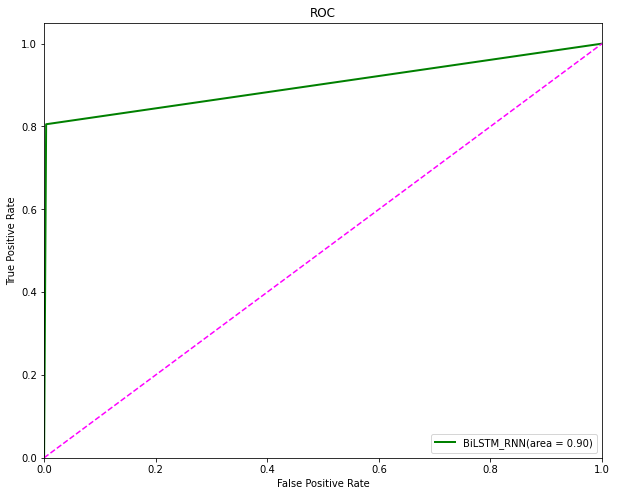

In [99]:
plt.figure(figsize=(10,8))
lw = 2
plt.plot(BiLSTM_RNN_fpr, BiLSTM_RNN_tpr, color='green', lw=lw, label='BiLSTM_RNN(area = %0.2f)' % BiLSTM_RNN_roc_auc)
plt.plot([0, 1], [0, 1], color='magenta', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

### LSTM-RNN (T. Ahmed et al 2022)

In [100]:
model = tf.keras.Sequential([

    tf.keras.layers.Embedding(vocab_size, embedding_dimension, 
                            weights=[embedding_matrix], 
                            input_length=max_word_length, 
                            trainable=False),

    tf.keras.layers.SpatialDropout1D(0.20),
    tf.keras.layers.LSTM((128), return_sequences=True),
    tf.keras.layers.Dropout(0.20),
    tf.keras.layers.LSTM((64)),
    tf.keras.layers.Dropout(0.50),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, kernel_regularizer=l2(0.01)),
    tf.keras.layers.Activation('linear')
])
model.compile(loss=tf.keras.losses.Hinge(),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 600, 200)          56883000  
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 600, 200)         0         
 lDropout1D)                                                     
                                                                 
 lstm_5 (LSTM)               (None, 600, 128)          168448    
                                                                 
 dropout_4 (Dropout)         (None, 600, 128)          0         
                                                                 
 lstm_6 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                      

### Model Training 

In [101]:
number_of_epochs = 25
batch_size = 256

LSTM_RNN_history = model.fit(x_train, y_train, 
                                    epochs = number_of_epochs,
                                    batch_size = batch_size,
                   validation_data=(x_test, y_test), 
                                    verbose=1)

Epoch 1/25
226/226 [==============================] - 31s 125ms/step - loss: 0.9438 - accuracy: 0.5171 - val_loss: 0.8353 - val_accuracy: 0.6024
Epoch 2/25
226/226 [==============================] - 27s 120ms/step - loss: 0.6376 - accuracy: 0.7126 - val_loss: 0.4016 - val_accuracy: 0.8147
Epoch 3/25
226/226 [==============================] - 27s 121ms/step - loss: 0.8129 - accuracy: 0.6117 - val_loss: 0.9006 - val_accuracy: 0.5628
Epoch 4/25
226/226 [==============================] - 28s 122ms/step - loss: 0.8761 - accuracy: 0.5745 - val_loss: 0.8402 - val_accuracy: 0.5942
Epoch 5/25
226/226 [==============================] - 27s 120ms/step - loss: 0.8342 - accuracy: 0.5967 - val_loss: 0.7848 - val_accuracy: 0.6277
Epoch 6/25
226/226 [==============================] - 27s 122ms/step - loss: 0.7624 - accuracy: 0.6353 - val_loss: 0.6870 - val_accuracy: 0.6794
Epoch 7/25
226/226 [==============================] - 27s 120ms/step - loss: 0.6681 - accuracy: 0.6848 - val_loss: 0.6535 - val_ac

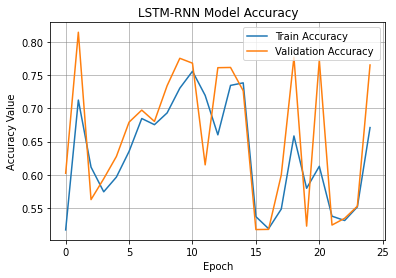

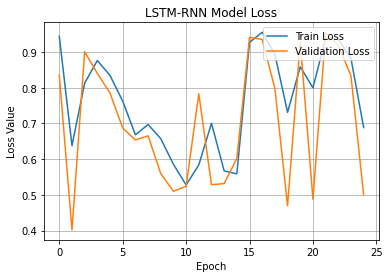

In [102]:
plt.plot(LSTM_RNN_history.history['accuracy'])
plt.plot(LSTM_RNN_history.history['val_accuracy'])
plt.title('LSTM-RNN Model Accuracy')
plt.ylabel('Accuracy Value')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Validation Accuracy '], loc='upper right')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.show()


plt.plot(LSTM_RNN_history.history['loss'])
plt.plot(LSTM_RNN_history.history['val_loss'])
plt.title('LSTM-RNN Model Loss')
plt.ylabel('Loss Value')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Validation Loss'], loc='upper right')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.show()

### Model predication and evaluation

In [103]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

451/451 [==============================] - 9s 21ms/step - loss: 0.4996 - accuracy: 0.7654
Test Loss: 0.4996407926082611
Test Accuracy: 0.7654398083686829


In [104]:
model_scores = model.predict(x_test, verbose=1, batch_size=256)

57/57 [==============================] - 3s 39ms/step


In [105]:
model_y_pred=np.where(model_scores>0.5,1,0)

In [106]:
model_y_pred

array([[1],
       [1],
       [0],
       ...,
       [1],
       [1],
       [0]])

In [107]:
print(accuracy_score(y_test, model_y_pred))

0.7654398003742982


In [108]:
print(classification_report(y_test, model_y_pred))

              precision    recall  f1-score   support

           0       0.81      0.68      0.74      7049
           1       0.74      0.84      0.79      7378

    accuracy                           0.77     14427
   macro avg       0.77      0.76      0.76     14427
weighted avg       0.77      0.77      0.76     14427



### confusion_matrix

In [109]:
model_CM=confusion_matrix(y_test, model_y_pred)
print(model_CM)

[[4828 2221]
 [1163 6215]]


In [110]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalised confusion matrix")
    else:
        print('Confusion matrix, without normalisation')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalisation
[[4828 2221]
 [1163 6215]]


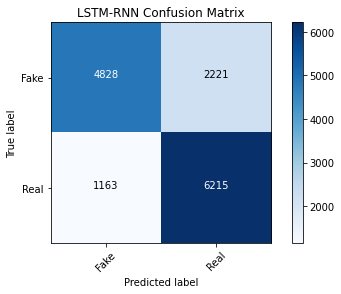

In [111]:
categories = ['Fake','Real']
LSTM_RNN_cnf_matrix = confusion_matrix(y_test, model_y_pred)
plot_confusion_matrix(cm=LSTM_RNN_cnf_matrix, classes=categories, title='LSTM-RNN Confusion Matrix')
plt.show()

### Model ROC Curve

In [112]:
from sklearn import metrics

In [113]:
LSTM_RNN_fpr, LSTM_RNN_tpr, _ = metrics.roc_curve(y_test,model_y_pred)
LSTM_RNN_roc_auc = metrics.auc(LSTM_RNN_fpr, LSTM_RNN_tpr)

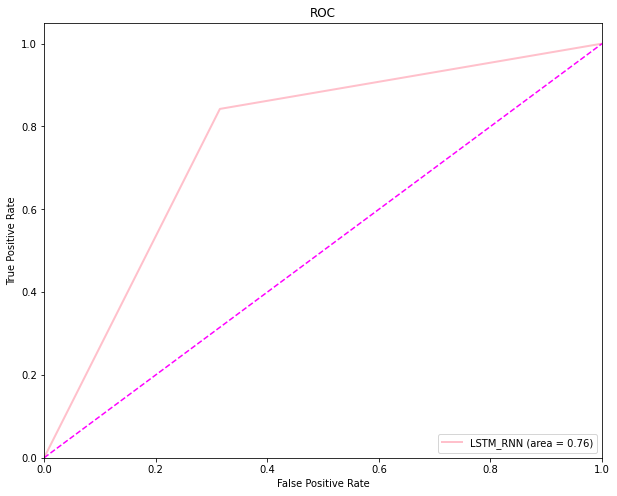

In [114]:
plt.figure(figsize=(10,8))
lw = 2
plt.plot(LSTM_RNN_fpr, LSTM_RNN_tpr, color='pink', lw=lw, label='LSTM_RNN (area = %0.2f)' % LSTM_RNN_roc_auc)
plt.plot([0, 1], [0, 1], color='magenta', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

### BiLSTM_CNN (Nasir, Khan et al, 2021)

In [118]:

BiLSTM_CNN_model = model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dimension,
                              weights=[embedding_matrix],
                              input_length=max_word_length,
                              trainable=False),
    tf.keras.layers.Dropout(0.2),
   tf.keras.layers.Conv1D(32, 5, activation='relu'),
   tf.keras.layers.MaxPooling1D(pool_size=4),

    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),

    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),


    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv1D(256, 4, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [119]:
BiLSTM_CNN_model.compile(loss=tf.keras.losses.Hinge(),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])
print(BiLSTM_CNN_model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 600, 200)          56883000  
                                                                 
 conv1d_5 (Conv1D)           (None, 596, 64)           64064     
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 149, 64)          0         
 1D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 149, 64)           0         
                                                                 
 conv1d_6 (Conv1D)           (None, 145, 128)          41088     
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 36, 128)          0         
 1D)                                                  

### model training 

In [120]:
number_of_epochs = 25
batch_size = 256
BiLSTM_CNN_history = BiLSTM_CNN_model.fit(x_train, y_train, 
                                    epochs = number_of_epochs,
                                    batch_size = batch_size,
                   validation_data=(x_test, y_test), 
                                    verbose=1)

Epoch 1/25
226/226 [==============================] - 15s 48ms/step - loss: 0.7766 - accuracy: 0.7441 - val_loss: 0.6769 - val_accuracy: 0.8215
Epoch 2/25
226/226 [==============================] - 10s 44ms/step - loss: 0.6566 - accuracy: 0.8342 - val_loss: 0.6367 - val_accuracy: 0.8605
Epoch 3/25
226/226 [==============================] - 10s 44ms/step - loss: 0.6321 - accuracy: 0.8580 - val_loss: 0.6194 - val_accuracy: 0.8754
Epoch 4/25
226/226 [==============================] - 10s 44ms/step - loss: 0.6229 - accuracy: 0.8667 - val_loss: 0.6534 - val_accuracy: 0.8395
Epoch 5/25
226/226 [==============================] - 10s 43ms/step - loss: 0.6131 - accuracy: 0.8768 - val_loss: 0.5993 - val_accuracy: 0.8940
Epoch 6/25
226/226 [==============================] - 10s 44ms/step - loss: 0.5991 - accuracy: 0.8907 - val_loss: 0.5933 - val_accuracy: 0.8996
Epoch 7/25
226/226 [==============================] - 10s 43ms/step - loss: 0.5906 - accuracy: 0.8991 - val_loss: 0.6227 - val_accuracy:

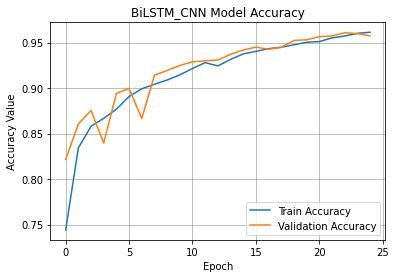

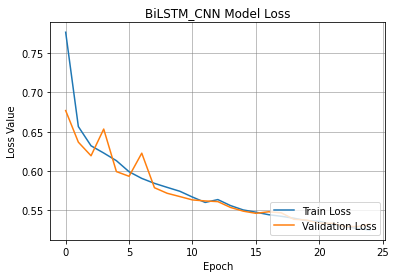

In [121]:
plt.plot(BiLSTM_CNN_history.history['accuracy'])
plt.plot(BiLSTM_CNN_history.history['val_accuracy'])
plt.title('BiLSTM_CNN Model Accuracy')
plt.ylabel('Accuracy Value')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Validation Accuracy'], loc='lower right')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.show()

plt.plot(BiLSTM_CNN_history.history['loss'])
plt.plot(BiLSTM_CNN_history.history['val_loss'])
plt.title('BiLSTM_CNN Model Loss')
plt.ylabel('Loss Value')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Validation Loss'], loc='lower right')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.show()

### Model predication and evaluation

In [122]:
test_loss, test_acc = BiLSTM_CNN_model.evaluate(x_test, y_test)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

451/451 [==============================] - 2s 5ms/step - loss: 0.5324 - accuracy: 0.9573
Test Loss: 0.5323922634124756
Test Accuracy: 0.9573022723197937


In [123]:
BiLSTM_CNN_scores = BiLSTM_CNN_model.predict(x_test, verbose=1, batch_size=256)

57/57 [==============================] - 1s 14ms/step


In [124]:
BiLSTM_CNN_scores

array([[8.7069744e-01],
       [9.9999881e-01],
       [1.4482428e-05],
       ...,
       [1.9914046e-01],
       [9.9999928e-01],
       [7.5651440e-07]], dtype=float32)

In [125]:
BiLSTM_CNN_y_pred=np.where(BiLSTM_CNN_scores>0.5,1,0)

In [126]:
BiLSTM_CNN_y_pred

array([[1],
       [1],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [127]:
print(accuracy_score(y_test, BiLSTM_CNN_y_pred))

0.9573022804463852


In [128]:
print(classification_report(y_test, BiLSTM_CNN_y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96      7049
           1       0.94      0.98      0.96      7378

    accuracy                           0.96     14427
   macro avg       0.96      0.96      0.96     14427
weighted avg       0.96      0.96      0.96     14427



### confusion_matrix

In [129]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalised confusion matrix")
    else:
        print('Confusion matrix, without normalisation')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalisation
[[6562  487]
 [ 129 7249]]


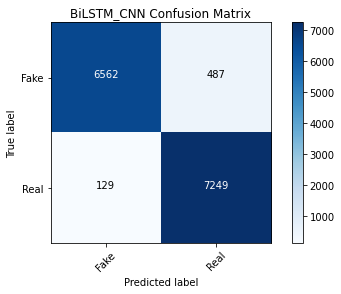

In [130]:
categories = ['Fake','Real']
BiLSTM_CNN_cnf_matrix = confusion_matrix(y_test, BiLSTM_CNN_y_pred)
plot_confusion_matrix(cm=BiLSTM_CNN_cnf_matrix, classes=categories, title='BiLSTM_CNN Confusion Matrix')
plt.show()

### Model ROC Curve 

In [131]:
BiLSTM_CNN_fpr, BiLSTM_CNN_tpr, _ = metrics.roc_curve(y_test,BiLSTM_CNN_y_pred)
BiLSTM_CNN_roc_auc = metrics.auc(BiLSTM_CNN_fpr, BiLSTM_CNN_tpr)

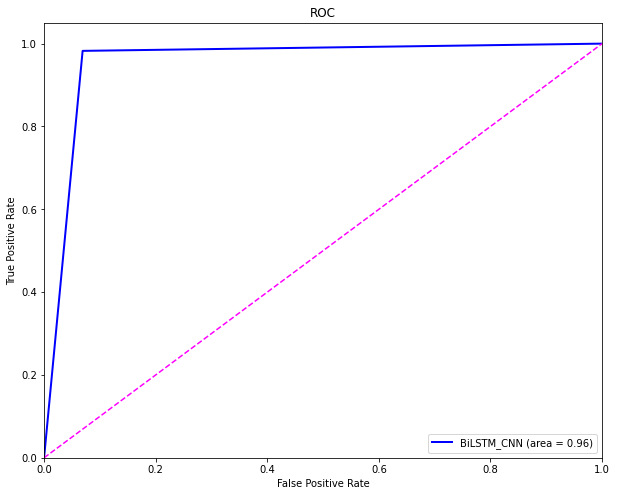

In [132]:
plt.figure(figsize=(10,8))
lw = 2
plt.plot(BiLSTM_CNN_fpr, BiLSTM_CNN_tpr, color='blue', lw=lw, label='BiLSTM_CNN (area = %0.2f)' % BiLSTM_CNN_roc_auc)
plt.plot([0, 1], [0, 1], color='magenta', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

### BLD-GRU (Hansrajh et al., 2021)

In [133]:
BLD_GRU_model = tf.keras.Sequential([

    tf.keras.layers.Embedding(vocab_size, embedding_dimension, 
                            weights=[embedding_matrix], 
                            input_length=max_word_length, 
                            trainable=False),
    
    tf.keras.layers.SpatialDropout1D(0.10),
    tf.keras.layers.GRU((128), return_sequences=True),
    tf.keras.layers.Dropout(0.20),
    tf.keras.layers.GRU((128)),
    tf.keras.layers.Dropout(0.40),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, kernel_regularizer=l2(0.01)),
    tf.keras.layers.Activation('linear')
])

In [134]:
BLD_GRU_model.compile(loss=tf.keras.losses.Hinge(),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [135]:
BLD_GRU_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [136]:
print(BLD_GRU_model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 600, 200)          56883000  
                                                                 
 spatial_dropout1d_3 (Spatia  (None, 600, 200)         0         
 lDropout1D)                                                     
                                                                 
 gru (GRU)                   (None, 600, 128)          126720    
                                                                 
 dropout_11 (Dropout)        (None, 600, 128)          0         
                                                                 
 gru_1 (GRU)                 (None, 128)               99072     
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                      

### Model Training 

In [137]:
number_of_epochs = 25
batch_size = 256

BLD_GRU_history = BLD_GRU_model.fit(x_train, y_train, 
                                    epochs = number_of_epochs,
                                    batch_size = batch_size,
                   validation_data=(x_test, y_test), 
                                    verbose=1)

Epoch 1/25
226/226 [==============================] - 32s 130ms/step - loss: 0.7758 - accuracy: 0.5465 - val_loss: 0.6906 - val_accuracy: 0.5690
Epoch 2/25
226/226 [==============================] - 29s 128ms/step - loss: 0.6878 - accuracy: 0.5705 - val_loss: 0.6468 - val_accuracy: 0.6197
Epoch 3/25
226/226 [==============================] - 29s 129ms/step - loss: 0.7011 - accuracy: 0.5938 - val_loss: 0.6741 - val_accuracy: 0.6197
Epoch 4/25
226/226 [==============================] - 29s 129ms/step - loss: 0.6276 - accuracy: 0.6202 - val_loss: 0.5874 - val_accuracy: 0.6469
Epoch 5/25
226/226 [==============================] - 29s 128ms/step - loss: 0.3844 - accuracy: 0.8269 - val_loss: 0.1805 - val_accuracy: 0.9332
Epoch 6/25
226/226 [==============================] - 29s 127ms/step - loss: 0.2475 - accuracy: 0.9111 - val_loss: 0.2021 - val_accuracy: 0.9121
Epoch 7/25
226/226 [==============================] - 29s 127ms/step - loss: 0.9581 - accuracy: 0.8617 - val_loss: 2.2366 - val_ac

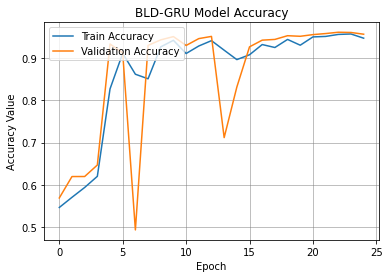

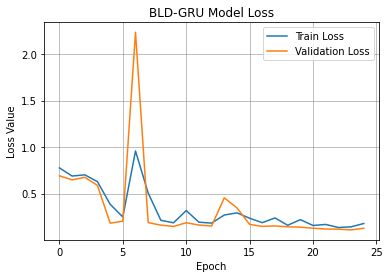

In [138]:
plt.plot(BLD_GRU_history.history['accuracy'])
plt.plot(BLD_GRU_history.history['val_accuracy'])
plt.title('BLD-GRU Model Accuracy')
plt.ylabel('Accuracy Value')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Validation Accuracy'], loc='upper left')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.show()

plt.plot(BLD_GRU_history.history['loss'])
plt.plot(BLD_GRU_history.history['val_loss'])
plt.title('BLD-GRU Model Loss')
plt.ylabel('Loss Value')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Validation Loss'], loc='upper right')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.show()

### Model predication and evaluation

In [139]:
test_loss, test_acc = BLD_GRU_model.evaluate(x_test, y_test)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

451/451 [==============================] - 9s 21ms/step - loss: 0.1258 - accuracy: 0.9563
Test Loss: 0.12577633559703827
Test Accuracy: 0.9563318490982056


In [140]:
BLD_GRU_scores = BLD_GRU_model.predict(x_test, verbose=1, batch_size=64)

226/226 [==============================] - 6s 24ms/step


In [141]:
BLD_GRU_scores

array([[ 0.3265466 ],
       [ 0.7435411 ],
       [-0.68621206],
       ...,
       [-0.00830202],
       [ 1.5801489 ],
       [-0.35598534]], dtype=float32)

In [142]:
BLD_GRU_y_pred=np.where(BLD_GRU_scores>0.4,1,0)

In [143]:
BLD_GRU_y_pred

array([[0],
       [1],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [144]:
print(accuracy_score(y_test, BLD_GRU_y_pred))

0.9582726831635129


In [145]:
print(classification_report(y_test, BLD_GRU_y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      7049
           1       0.96      0.96      0.96      7378

    accuracy                           0.96     14427
   macro avg       0.96      0.96      0.96     14427
weighted avg       0.96      0.96      0.96     14427



### confusion_matrix

In [146]:
BLD_GRU_CM=confusion_matrix(y_test, BLD_GRU_y_pred)
print(BLD_GRU_CM)

[[6749  300]
 [ 302 7076]]


In [147]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalised confusion matrix")
    else:
        print('Confusion matrix, without normalisation')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Real label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalisation
[[6749  300]
 [ 302 7076]]


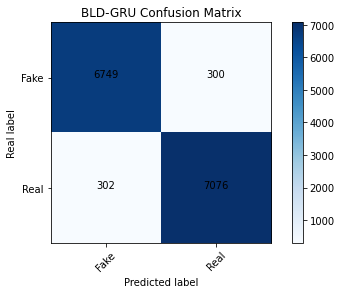

In [148]:
categories = ['Fake','Real']
BLD_GRU_cnf_matrix = confusion_matrix(y_test, BLD_GRU_y_pred)
plot_confusion_matrix(cm=BLD_GRU_cnf_matrix, classes=categories, title='BLD-GRU Confusion Matrix')
plt.show()

# Model ROC 

In [149]:
from sklearn import metrics
BLD_GRU_fpr, BLD_GRU_tpr, _ = metrics.roc_curve(y_test,BLD_GRU_y_pred)
BLD_GRU_roc_auc = metrics.auc(BLD_GRU_fpr, BLD_GRU_tpr)

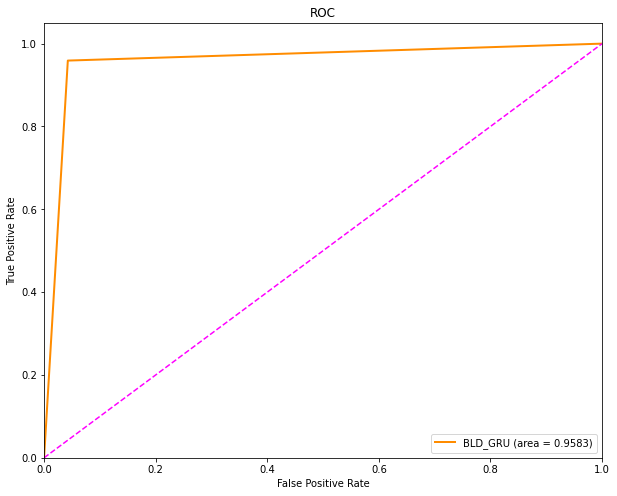

In [150]:
plt.figure(figsize=(10,8))
lw = 2
plt.plot(BLD_GRU_fpr, BLD_GRU_tpr, color='darkorange', lw=lw, label='BLD_GRU (area = %0.4f)' % BLD_GRU_roc_auc)
plt.plot([0, 1], [0, 1], color='magenta', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

## Proposed Hybrid Framework

In [151]:
from keras.callbacks import EarlyStopping
overfitCallback = EarlyStopping(monitor='val_loss',
                                min_delta=0,
                                patience=5,
                                verbose=1, mode='auto')

DCNN_SVM_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dimension,
                              weights=[embedding_matrix],
                              input_length=max_word_length,
                              trainable=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(32, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),

    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),

    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),

    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv1D(256, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),

   # tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

DCNN_SVM_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
#DCNN_SVM.pop() # this will remove the last layer
#DCNN_SVM.summary() # check the network

feature_mapping = DCNN_SVM_model(x_test)
from sklearn import svm
clf = svm.SVC()
clf.fit(feature_mapings, y)

print(DCNN_SVM_model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 600, 200)          56883000  
                                                                 
 dropout_13 (Dropout)        (None, 600, 200)          0         
                                                                 
 conv1d_7 (Conv1D)           (None, 596, 32)           32032     
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 149, 32)          0         
 1D)                                                             
                                                                 
 dropout_14 (Dropout)        (None, 149, 32)           0         
                                                                 
 conv1d_8 (Conv1D)           (None, 145, 64)           10304     
                                                      

### Proposed Framework training 

In [152]:
number_of_epochs = 25
batch_size = 256

DCNN_SVM_model_history = DCNN_SVM_model.fit(x_train, y_train, 
                                    epochs = number_of_epochs,
                                    batch_size = batch_size,
                   validation_data=(x_test, y_test), 
                                    verbose=1)

Epoch 1/25
226/226 [==============================] - 11s 34ms/step - loss: 0.4002 - accuracy: 0.7944 - val_loss: 0.1819 - val_accuracy: 0.9287
Epoch 2/25
226/226 [==============================] - 7s 30ms/step - loss: 0.1710 - accuracy: 0.9331 - val_loss: 0.1167 - val_accuracy: 0.9565
Epoch 3/25
226/226 [==============================] - 7s 29ms/step - loss: 0.1294 - accuracy: 0.9498 - val_loss: 0.0996 - val_accuracy: 0.9619
Epoch 4/25
226/226 [==============================] - 7s 29ms/step - loss: 0.1052 - accuracy: 0.9595 - val_loss: 0.0840 - val_accuracy: 0.9687
Epoch 5/25
226/226 [==============================] - 7s 29ms/step - loss: 0.0960 - accuracy: 0.9637 - val_loss: 0.0736 - val_accuracy: 0.9731
Epoch 6/25
226/226 [==============================] - 7s 29ms/step - loss: 0.0853 - accuracy: 0.9675 - val_loss: 0.0758 - val_accuracy: 0.9713
Epoch 7/25
226/226 [==============================] - 7s 29ms/step - loss: 0.0793 - accuracy: 0.9691 - val_loss: 0.0713 - val_accuracy: 0.974

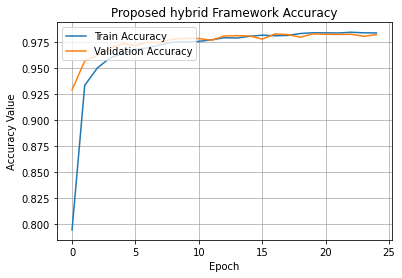

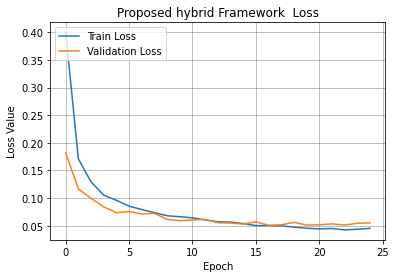

In [153]:
plt.plot(DCNN_SVM_model_history.history['accuracy'])
plt.plot(DCNN_SVM_model_history.history['val_accuracy'])
plt.title('Proposed hybrid Framework Accuracy')
plt.ylabel('Accuracy Value')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Validation Accuracy'], loc='lower left')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.show()

plt.plot(DCNN_SVM_model_history.history['loss'])
plt.plot(DCNN_SVM_model_history.history['val_loss'])
plt.title('Proposed hybrid Framework  Loss')
plt.ylabel('Loss Value')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Validation Loss'], loc='upper left')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.show()

### Model predication and evaluation

In [154]:
test_loss, test_acc = DCNN_SVM_model.evaluate(x_test, y_test)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

451/451 [==============================] - 2s 4ms/step - loss: 0.0551 - accuracy: 0.9818
Test Loss: 0.05512888357043266
Test Accuracy: 0.9817702770233154


In [155]:
DCNN_SVM_scores = DCNN_SVM_model.predict(x_test, verbose=1, batch_size=256)

57/57 [==============================] - 1s 9ms/step


In [156]:
DCNN_SVM_scores

array([[6.3055694e-02],
       [9.9581736e-01],
       [1.0210844e-04],
       ...,
       [4.5719981e-02],
       [9.9978286e-01],
       [1.7255264e-04]], dtype=float32)

In [157]:
DCNN_SVM_y_pred=np.where(DCNN_SVM_scores>0.5,1,0)


In [158]:
DCNN_SVM_y_pred


array([[0],
       [1],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [159]:
print(accuracy_score(y_test, DCNN_SVM_y_pred))

0.9817702918139599


In [160]:
print(classification_report(y_test, DCNN_SVM_y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      7049
           1       0.98      0.99      0.98      7378

    accuracy                           0.98     14427
   macro avg       0.98      0.98      0.98     14427
weighted avg       0.98      0.98      0.98     14427



### Confusion Matrix

In [161]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalised confusion matrix")
    else:
        print('Confusion matrix, without normalisation')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalisation
[[6872  177]
 [  86 7292]]


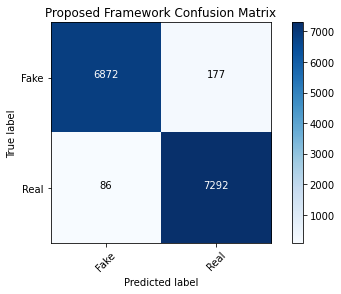

In [162]:
categories = ['Fake','Real']
DCNN_SVM_cnf_matrix = confusion_matrix(y_test, DCNN_SVM_y_pred)
plot_confusion_matrix(cm=DCNN_SVM_cnf_matrix, classes=categories, title='Proposed Framework Confusion Matrix')
plt.show()

### ROC Curve

In [163]:
DCNN_SVM_fpr, DCNN_SVM_tpr, _ = metrics.roc_curve(y_test,DCNN_SVM_y_pred)
DCNN_SVM_roc_auc = metrics.auc(DCNN_SVM_fpr, DCNN_SVM_tpr)

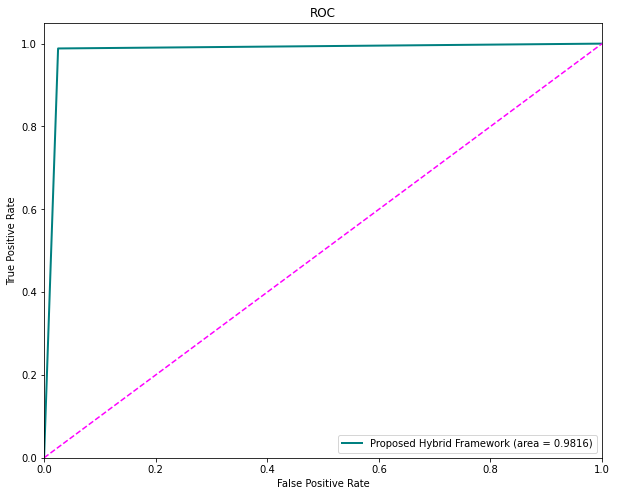

In [164]:
plt.figure(figsize=(10,8))
lw = 2
plt.plot(DCNN_SVM_fpr, DCNN_SVM_tpr, color='teal', lw=lw, label='Proposed Hybrid Framework (area = %0.4f)' % DCNN_SVM_roc_auc)
plt.plot([0, 1], [0, 1], color='magenta', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

## Performance Evaluation ROC Curves of all Models

In [165]:
#LSTM_fpr, LSTM_tpr, _ = metrics.roc_curve(y_test,LSTM_y_pred)
#LSTM_roc_auc = metrics.auc(LSTM_fpr, LSTM_tpr)

#BiLSTM_RNN
BiLSTM_RNN_fpr, BiLSTM_RNN_tpr, _ = metrics.roc_curve(y_test,BiLSTM_RNN_y_pred)
BiLSTM_RNN_roc_auc = metrics.auc(BiLSTM_RNN_fpr, BiLSTM_RNN_tpr)

#LSTM_RNN
LSTM_RNN_fpr, LSTM_RNN_tpr, _ = metrics.roc_curve(y_test,model_y_pred)
LSTM_RNN_roc_auc = metrics.auc(LSTM_RNN_fpr, LSTM_RNN_tpr)

#BiLSTM_CNN
BiLSTM_CNN_fpr, BiLSTM_CNN_tpr, _ = metrics.roc_curve(y_test,BiLSTM_CNN_y_pred)
BiLSTM_CNN_roc_auc = metrics.auc(BiLSTM_CNN_fpr, BiLSTM_CNN_tpr)
#BLD_GRU
BLD_GRU_fpr, BLD_GRU_tpr, _ = metrics.roc_curve(y_test,BLD_GRU_y_pred)
BLD_GRU_roc_auc = metrics.auc(BLD_GRU_fpr, BLD_GRU_tpr)

#Proposed Hybrid Framework
DCNN_SVM_fpr, DCNN_SVM_tpr, _ = metrics.roc_curve(y_test,DCNN_SVM_y_pred)
DCNN_SVM_roc_auc = metrics.auc(DCNN_SVM_fpr, DCNN_SVM_tpr)


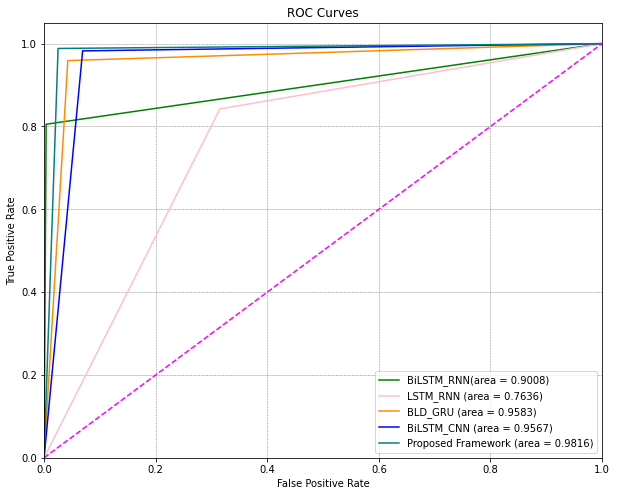

In [166]:
plt.figure(figsize=(10,8))
lw = 1.5
#plt.plot(LSTM_fpr, LSTM_tpr, color='orange', lw=lw, label='LSTM(area = %0.4f)' % LSTM_roc_auc)
plt.plot(BiLSTM_RNN_fpr, BiLSTM_RNN_tpr, color='green', lw=lw, label='BiLSTM_RNN(area = %0.4f)' % BiLSTM_RNN_roc_auc)
plt.plot(LSTM_RNN_fpr, LSTM_RNN_tpr, color='pink', lw=lw, label='LSTM_RNN (area = %0.4f)' % LSTM_RNN_roc_auc)
plt.plot(BLD_GRU_fpr, BLD_GRU_tpr, color='darkorange', lw=lw, label='BLD_GRU (area = %0.4f)' % BLD_GRU_roc_auc)
plt.plot(BiLSTM_CNN_fpr, BiLSTM_CNN_tpr, color='blue', lw=lw, label='BiLSTM_CNN (area = %0.4f)' % BiLSTM_CNN_roc_auc)
plt.plot(DCNN_SVM_fpr, DCNN_SVM_tpr, color='teal', lw=lw, label='Proposed Framework (area = %0.4f)' % DCNN_SVM_roc_auc)

plt.plot([0, 1], [0, 1], color='magenta', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()
